In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

### Set the number of lilypads

In [18]:
n = 100


### seed the random number generator


In [19]:
random.seed(1)

In [20]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value

In [21]:
#
# Evaluate the analytic solution shown above
#
# loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval.append(1)
    else:
        sum = 1.0
        for i in range(0,npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum = sum + 1.0/(npad+1)*(eval[npad-i-1])
        eval.append(sum)
    #print("Theory: ",npad,eval[npad])
  

In [22]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between 1 and the number of lilypads left to jump
            jump = 0
            while jump == 0:
                jump = int(random.uniform((start-current_paddle),(end-current_paddle+1)))
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
  

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.497500
Expectation value for n = 2 is 2.328200
Expectation value for n = 3 is 3.243000
Expectation value for n = 4 is 4.191700
Expectation value for n = 5 is 5.233300
Expectation value for n = 6 is 6.098500
Expectation value for n = 7 is 7.107600
Expectation value for n = 8 is 8.104900
Expectation value for n = 9 is 9.010700
Expectation value for n = 10 is 10.075200
Expectation value for n = 11 is 11.086400
Expectation value for n = 12 is 12.054900
Expectation value for n = 13 is 12.972200
Expectation value for n = 14 is 14.146700
Expectation value for n = 15 is 15.103900
Expectation value for n = 16 is 16.151100
Expectation value for n = 17 is 16.973400
Expectation value for n = 18 is 18.160500
Expectation value for n = 19 is 18.927600
Expectation value for n = 20 is 20.324600
Expectation value for n = 21 is 21.445300
Expectation value for n = 22 is 21.919800
Expectation value for n = 23 is 22.886600
Expectation 

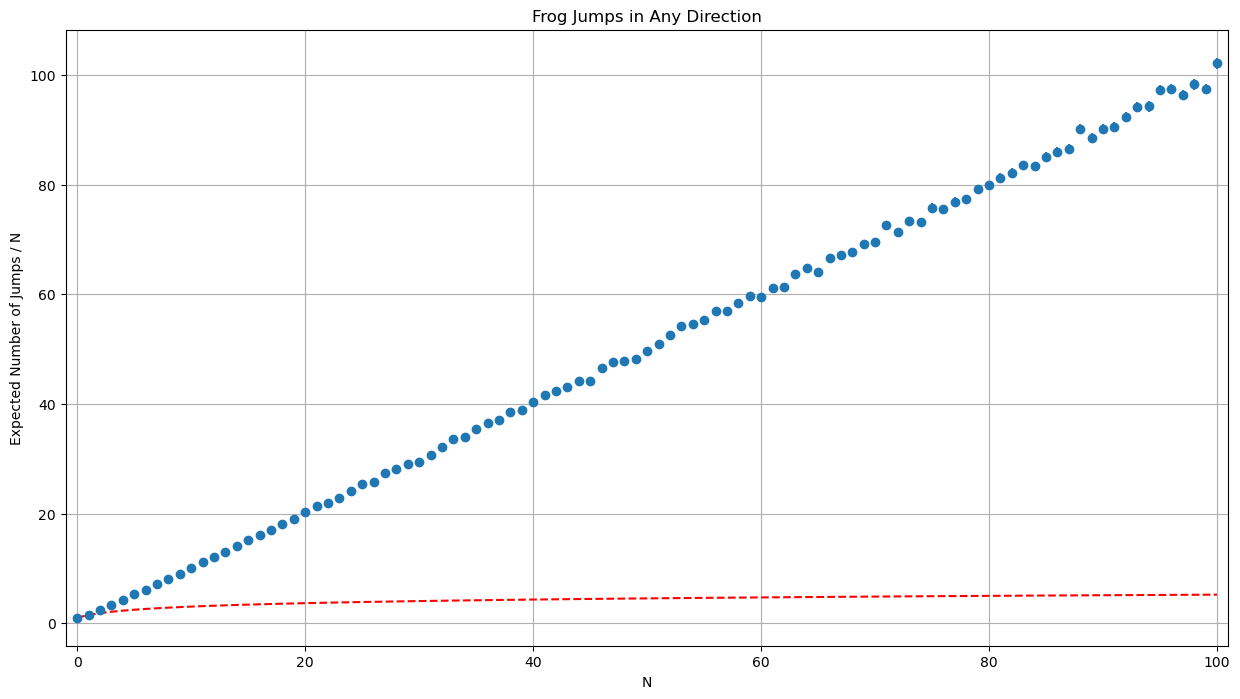

In [23]:
# plot the results

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Jumps in Any Direction")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,eval,'r--')


## The new rule set would make the probability of reaching the end linearly dependent on how many lily pads there are.

## Now we only let the frog jump forward but with the probability of jumping to some lily pad to be inversely proportional to the length of the jump

In [26]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 10000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
eval_harmonic = [] # array for the analytic solution
x_harmonic = [] # array for the harmonic mean
sigma = [] # array for the error on the expectation value

In [27]:
#
# Run the simulation
#
# (also, evaluate the harmonic mean along the way)
#
for npad in range(0,n+1):
    
    x_harmonic.append(npad+1)
    x.append(npad)
    
    sum2 = (npad+1.0)/stats.hmean(x_harmonic)
    eval_harmonic.append(sum2)
    
    #print ("Harmonic mean for npad = ",npad," = ", sum2)
    
    end = npad+1
    current_paddle = start
    
    # run the simulation n_trys times
    for j in range(n_trys):
        
        # run the simulation until the frog reaches the other side
        while current_paddle < end:
            # choose a random jump size between 1 and the number of lilypads left to jump
            paddle_choices = []
            probs = []
            for i in range(current_paddle+1, end+1):
                paddle_choices.append(i)
                probs.append(1/(i-current_paddle))
                
            jump = random.choices(paddle_choices, weights=probs, k=1)[0]
            #print ("Jump = ",jump)
            
            # jump ahead
            current_paddle = current_paddle + jump
            #print ("Now at ",current_paddle)
            
            # keep track of the number of jumps
            jumpsum = jumpsum + 1
            
        # reset the frog to the start for the next simulation
        current_paddle = start
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        
        # keep track of the total number of jumps for all simulations
        total_jumps = total_jumps + jumpsum
        
        # reset the jumpsum for the next simulation
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    # calculate the expectation value
    expectation_value = total_jumps/n_trys*1.0
    
    # store the expectation value and the error on the expectation value for plotting
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    
    # reset the total number of jumps for all simulations, for the next value of npad
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
  

Expectation value for n = 0 is 1.000000
Expectation value for n = 1 is 1.670700
Expectation value for n = 2 is 1.814400
Expectation value for n = 3 is 2.140100
Expectation value for n = 4 is 2.228300
Expectation value for n = 5 is 2.361700
Expectation value for n = 6 is 2.395500
Expectation value for n = 7 is 2.533300
Expectation value for n = 8 is 2.571700
Expectation value for n = 9 is 2.651400
Expectation value for n = 10 is 2.674600
Expectation value for n = 11 is 2.755400
Expectation value for n = 12 is 2.763700
Expectation value for n = 13 is 2.821400
Expectation value for n = 14 is 2.832100
Expectation value for n = 15 is 2.867100
Expectation value for n = 16 is 2.888600
Expectation value for n = 17 is 2.923300
Expectation value for n = 18 is 2.941100
Expectation value for n = 19 is 2.983700
Expectation value for n = 20 is 2.986300
Expectation value for n = 21 is 3.020300
Expectation value for n = 22 is 3.024100
Expectation value for n = 23 is 3.075600
Expectation value for n = 

<ErrorbarContainer object of 3 artists>

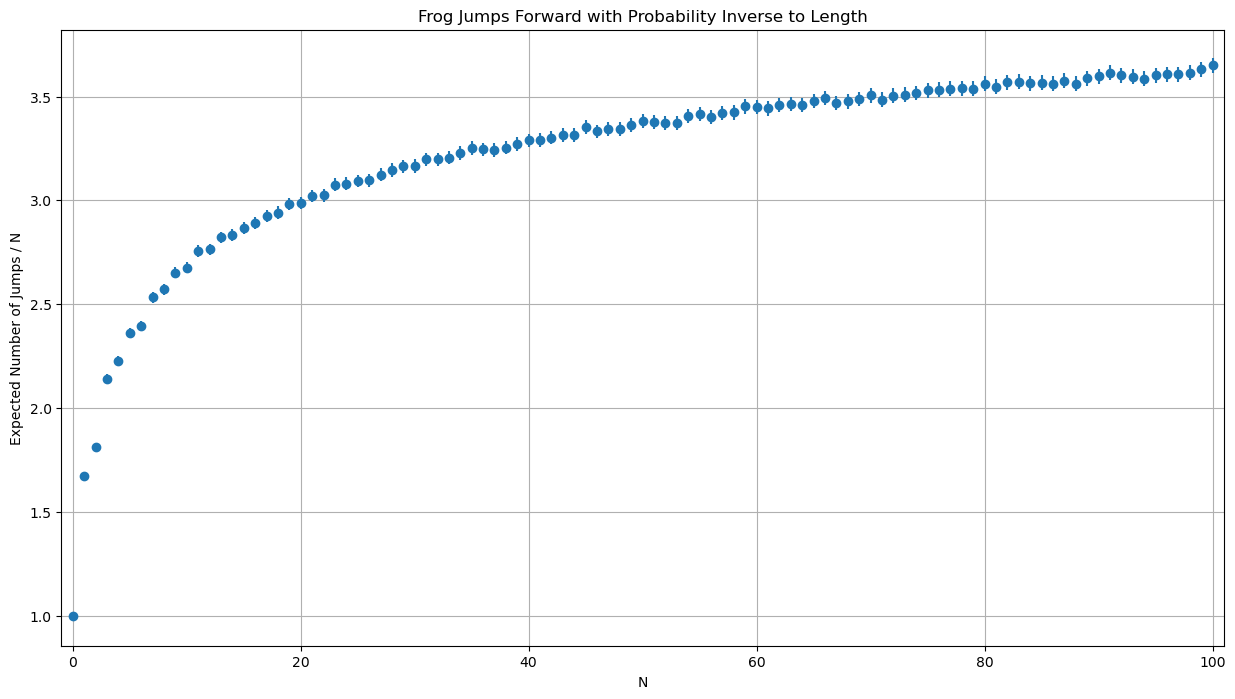

In [29]:
# plot the results

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Jumps Forward with Probability Inverse to Length")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
